In [1]:
from data_loading import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = load_final_dataframe()
df_nonzero = df.loc[df.precinct.isin(df.precinct.unique()[df.groupby(['precinct']).sum().bike_count > 1])]
precinct_data = load_precinct_data()

C:\Users\Ignacio\Ignacio\Uni\Y4\DLY\Project\city-biking\data_loading.py:114: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ksi = ksi.groupby(['precinct', 'year']).sum()


In [3]:
def bike_plot(df, groupby):
    fig, axs = plt.subplots(3)

    sns.scatterplot(y=df.groupby(groupby).sum().bike_count, x=df.groupby(groupby).sum().index, color='y', ax=axs[0])
    axs[0].legend(['bike_count'])

    sns.scatterplot(y=df.groupby(groupby).sum().crashes, x=df.groupby(groupby).sum().index, color='y', ax=axs[1])
    sns.scatterplot(y=df.groupby(groupby).sum().injuries, x=df.groupby(groupby).sum().index, color='r', ax=axs[1])
    sns.scatterplot(y=df.groupby(groupby).sum().fatalities, x=df.groupby(groupby).sum().index, color='k', ax=axs[1])
    axs[1].legend(['absolute crashes', 'absolute injuries', 'absolute fatalities'])

    sns.scatterplot(y=df.groupby(groupby).sum().crashes / df.groupby(groupby).sum().bike_count, x=df.groupby(groupby).sum().index, color='y', ax=axs[2])
    sns.scatterplot(y=df.groupby(groupby).sum().injuries / df.groupby(groupby).sum().bike_count, x=df.groupby(groupby).sum().index, color='r', ax=axs[2])
    sns.scatterplot(y=df.groupby(groupby).sum().fatalities / df.groupby(groupby).sum().bike_count, x=df.groupby(groupby).sum().index, color='k', ax=axs[2])
    axs[2].legend(['relative crashes', 'relative injuries', 'relative fatalities'])

    plt.show()

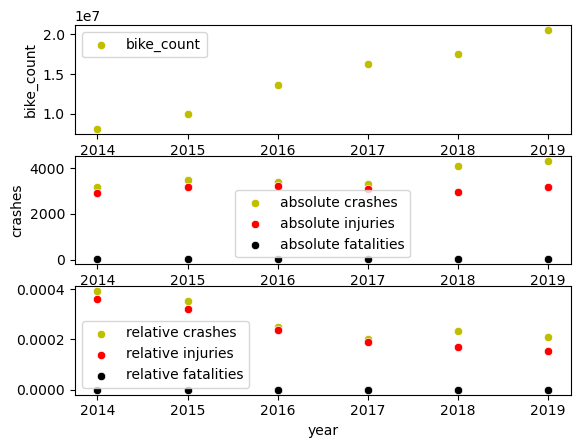

In [4]:
bike_plot(df_nonzero, 'year')

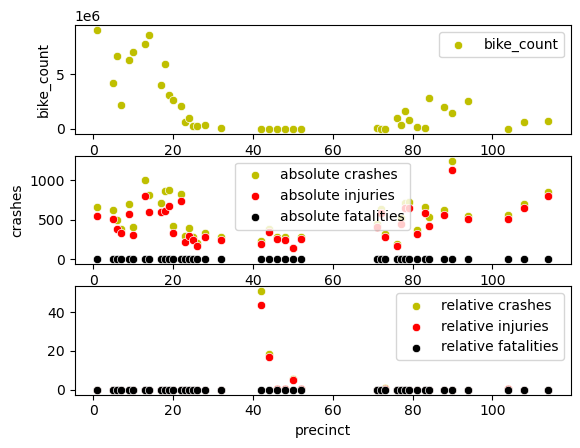

In [5]:
bike_plot(df_nonzero, 'precinct')

In [143]:
def nyc_plot(df, column, n_largest, relative=False):
    if relative:
        precincts_max = pd.Series(df.groupby('precinct').sum().loc[:, column] / df.groupby('precinct').sum().bike_count).nlargest(n_largest).index
    else:
        precincts_max = df.groupby('precinct').sum().loc[:, column].nlargest(n_largest).index

    color = []
    for i in precinct_data.index:
        if i in list(map(str, precincts_max)):
            color.append('r')
        elif i in list(map(str, df.precinct)):
            color.append('b')
        else:
            color.append('c')

    precinct_data.plot(color=color)

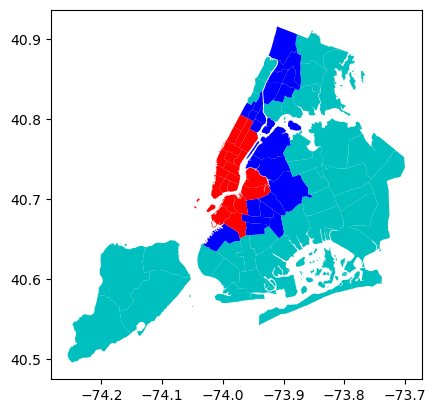

In [144]:
nyc_plot(df_nonzero, 'bike_count', 20)

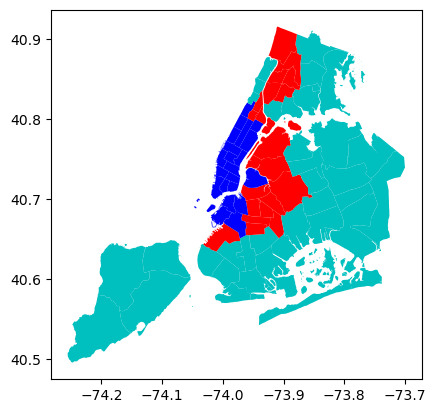

In [137]:
nyc_plot(df_nonzero, 'crashes', 20, True)

In [163]:
def idk_plot(df, column, n_largest, relative=False):
    if relative:
        precincts_max = pd.Series(df.groupby('precinct').sum().loc[:, column] / df.groupby('precinct').sum().bike_count).nlargest(n_largest).index
    else:
        precincts_max = df.groupby('precinct').sum().loc[:, column].nlargest(n_largest).index
    
    sns.scatterplot(y=df.loc[df.precinct.isin(precincts_max)].bike_count, x=df.loc[df.precinct.isin(precincts_max)].year, color='b')
    sns.scatterplot(y=df.loc[df.precinct.isin(precincts_max)].crashes, x=df.loc[df.precinct.isin(precincts_max)].year, color='y')
    sns.scatterplot(y=df.loc[df.precinct.isin(precincts_max)].injuries, x=df.loc[df.precinct.isin(precincts_max)].year, color='r')
    sns.scatterplot(y=df.loc[df.precinct.isin(precincts_max)].fatalities, x=df.loc[df.precinct.isin(precincts_max)].year, color='k')

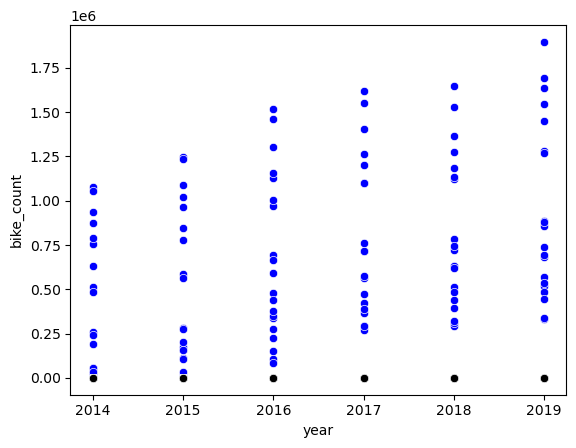

In [164]:
idk_plot(df_nonzero, 'bike_count', 20)

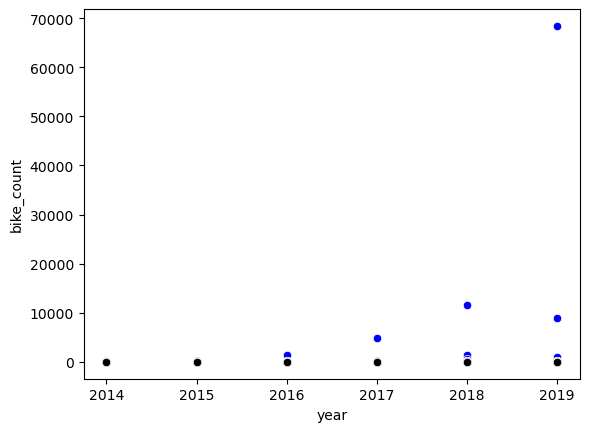

In [166]:
idk_plot(df_nonzero, 'crashes', 10, True)